In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load the dataset
url = '/content/drive/MyDrive/Colab_Notebooks/Housing.csv'
data = pd.read_csv(url)
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [6]:
# Preprocessing

# Convert categorical variables to numerical using one-hot encoding
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
numeric_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

X = data.drop('price', axis=1)
y = data['price']

X_transformed = preprocessor.fit_transform(X)

In [7]:
# Split the dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_transformed, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [8]:
# Build the neural network
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer with linear activation for regression
])

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [10]:
# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/100
12/12 [==============================] - 1s 26ms/step - loss: 25822066900992.0000 - mae: 4762405.5000 - val_loss: 27060959444992.0000 - val_mae: 4768786.5000
Epoch 2/100
12/12 [==============================] - 0s 17ms/step - loss: 25822050123776.0000 - mae: 4762403.5000 - val_loss: 27060938473472.0000 - val_mae: 4768784.5000
Epoch 3/100
12/12 [==============================] - 0s 9ms/step - loss: 25822024957952.0000 - mae: 4762400.5000 - val_loss: 27060907016192.0000 - val_mae: 4768781.0000
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 25821991403520.0000 - mae: 4762397.0000 - val_loss: 27060860878848.0000 - val_mae: 4768776.0000
Epoch 5/100
12/12 [==============================] - 0s 9ms/step - loss: 25821930586112.0000 - mae: 4762391.0000 - val_loss: 27060787478528.0000 - val_mae: 4768769.0000
Epoch 6/100
12/12 [==============================] - 0s 15ms/step - loss: 25821850894336.0000 - mae: 4762383.0000 - val_loss: 27060684718080.0000 - val_m

In [11]:
# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test)
print("Test MAE:", test_mae)

3/3 [==============================] - 0s 3ms/step - loss: 25869030522880.0000 - mae: 4654410.0000
Test MAE: 4654410.0


In [12]:
# Make predictions
predictions = model.predict(X_test)

3/3 [==============================] - 0s 6ms/step


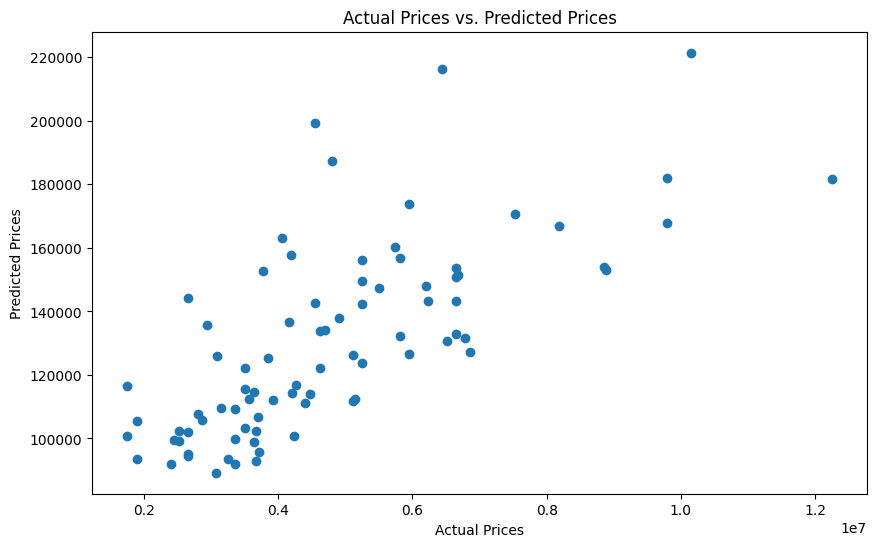

In [13]:
# Visualize predictions vs. actual
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()